# Data preprocessing

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D
from tensorflow.keras.layers import Conv1D, MaxPool1D, Embedding
from tensorflow.keras.models import Model

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
df.columns = ['labels', 'data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
y = df['b_labels'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size=.33)

In [ ]:
max_vocab_size = 10000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [ ]:
tokenizer.fit_on_texts(x_train)

In [ ]:
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
len(sequences_train[0])

30

In [ ]:
len(x_train[0])

111

In [ ]:
word2idx = tokenizer.word_index
V = len(word2idx)

In [ ]:
data_train = pad_sequences(sequences_train)
data_train.shape

(3733, 162)

In [ ]:
T = data_train.shape[1]

In [ ]:
T

162

In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
data_test.shape

(1839, 162)

# Building the Model

In [ ]:
D = 20
i = Input(shape=(T,))
x = Embedding(V+1, D)(i)

x = Conv1D(32, 3, activation='relu')(x)
x = MaxPool1D(3)(x)

x = Conv1D(64, 3, activation='relu')(x)
x = MaxPool1D(3)(x)

x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(x=data_train, y=y_train, epochs=5, validation_data=(data_test, y_test))

Epoch 1/5
117/117 [==============================] - 4s 20ms/step - loss: 0.3994 - accuracy: 0.8567 - val_loss: 0.2735 - val_accuracy: 0.8706
Epoch 2/5
117/117 [==============================] - 3s 22ms/step - loss: 0.1613 - accuracy: 0.9293 - val_loss: 0.1159 - val_accuracy: 0.9608
Epoch 3/5
117/117 [==============================] - 3s 29ms/step - loss: 0.0364 - accuracy: 0.9837 - val_loss: 0.0775 - val_accuracy: 0.9685
Epoch 4/5
117/117 [==============================] - 2s 17ms/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.0794 - val_accuracy: 0.9821
Epoch 5/5
117/117 [==============================] - 2s 17ms/step - loss: 0.0056 - accuracy: 0.9995 - val_loss: 0.0776 - val_accuracy: 0.9821


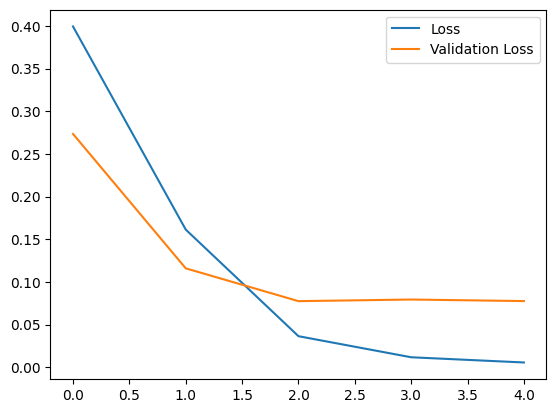

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

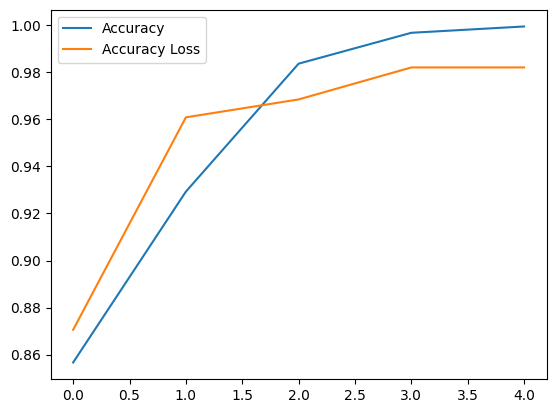

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Accuracy Loss')
plt.legend()
plt.show()